In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [31]:
image = cv2.imread("/content/Sample Image.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [32]:
image

array([[[183, 231, 254],
        [183, 231, 254],
        [183, 231, 254],
        ...,
        [189, 236, 255],
        [189, 236, 255],
        [189, 236, 255]],

       [[183, 231, 254],
        [183, 231, 254],
        [183, 231, 254],
        ...,
        [189, 236, 255],
        [189, 236, 255],
        [189, 236, 255]],

       [[183, 231, 254],
        [183, 231, 254],
        [183, 231, 254],
        ...,
        [189, 236, 255],
        [189, 236, 255],
        [189, 236, 255]],

       ...,

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [129, 139, 104],
        [129, 139, 104],
        [129, 139, 104]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [128, 138, 103],
        [128, 138, 103],
        [128, 138, 103]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [128, 138, 103],
        [128, 138, 103],
        [128, 138, 103]]

In [33]:
original_shape = image.shape

In [34]:
pixels = image.reshape((-1, 3))

In [35]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pixels)
cluster_labels = kmeans.labels_

In [36]:
cluster_centers = kmeans.cluster_centers_
brightness = np.sum(cluster_centers, axis=1)

background_label = np.argmax(brightness)

masked_pixels = pixels.copy()
masked_pixels[cluster_labels == background_label] = [255, 255, 255]


In [37]:
segmented_image = masked_pixels.reshape(original_shape)

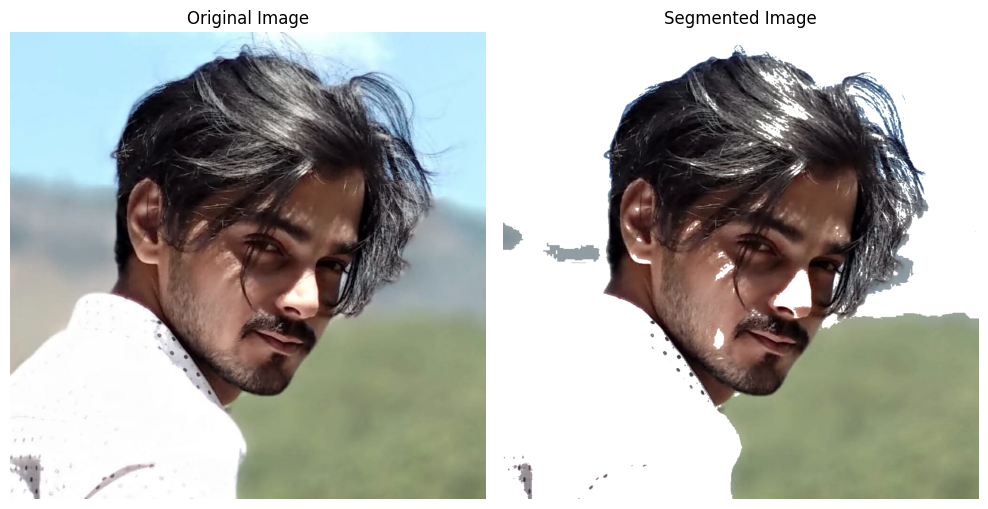

In [38]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title("Segmented Image")
plt.axis("off")

plt.tight_layout()
plt.show()